In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#https://catalog.data.gov/dataset/traffic-violations-56dda  
#https://github.com/python-visualization/folium

In [3]:
stops = pd.read_csv('./data/traffic-violation.csv')

In [4]:
stops.head()

,date_of_stop,time_of_stop,agency,subagency,description,location,latitude,longitude,vehicle_type,year,make,model,color,violation_type,race,gender,driver_state,driver_city,dl_state,arrest_type
0,2016-11-23T00:00:00,10:56:00,MCP,"2nd district, Bethesda",DRIVING MOTOR VEHICLE ON HIGHWAY WITHOUT REQUI...,355 @ 410,38.984470,-77.094138,28 - Other,0.0,00,SCOOTER,GREEN,Citation,WHITE,M,DC,WASHINGTON,DC,A - Marked Patrol
1,2016-11-23T00:00:00,13:36:00,MCP,"5th district, Germantown",DRIVER WHEN TURNING LEFT FAIL TO YIELD RIGHT O...,FREDERICK RD/SHAKESPEARE BLVD,39.198538,-77.244758,02 - Automobile,2005.0,HONDA,ACCORD,WHITE,Citation,OTHER,F,MD,FREDERICK,MD,A - Marked Patrol
2,2016-11-23T00:00:00,14:16:00,MCP,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,S/B 29 @ BLACKBURN RD,39.104683,-76.933665,02 - Automobile,2012.0,HOND,2S,WHITE,Citation,WHITE,F,MD,COLUMBIA,MD,A - Marked Patrol
3,2016-11-23T00:00:00,16:45:00,MCP,"5th district, Germantown",FRAUD IN USE OF MVA ID CARD,RIVER RD & FALLS RD,NaN,NaN,02 - Automobile,2016.0,FORD,FUSION,SILVER,Citation,BLACK,M,MD,BELTSVILLE,MD,B - Unmarked Patrol
4,2016-11-23T00:00:00,16:45:00,MCP,"5th district, Germantown",POSSESSING MORE THAN ONE DRIVER'S LICENSE AT A...,RIVER RD & FALLS RD,NaN,NaN,02 - Automobile,2016.0,FORD,FUSION,SILVER,Citation,BLACK,M,MD,BELTSVILLE,MD,B - Unmarked Patrol


In [5]:
stops.shape

(154287, 20)

In [6]:
stops['color'].value_counts()

BLACK          31640
SILVER         28416
WHITE          24837
GRAY           16996
RED            11952
BLUE           11037
GOLD            5020
GREEN           4808
BLUE, DARK      3566
TAN             3098
MAROON          2434
BLUE, LIGHT     2036
BEIGE           1558
GREEN, DK       1488
GREEN, LGT       771
BROWN            709
YELLOW           611
ORANGE           478
BRONZE           384
PURPLE           335
MULTICOLOR       148
CREAM             90
COPPER            63
PINK              13
CHROME             2
CAMOUFLAGE         2
Name: color, dtype: int64

In [7]:
stops['arrest_type'].value_counts()

A - Marked Patrol                         126935
Q - Marked Laser                           14050
B - Unmarked Patrol                         5628
G - Marked Moving Radar (Stationary)        1251
L - Motorcycle                              1232
E - Marked Stationary Radar                 1224
O - Foot Patrol                             1131
S - License Plate Recognition                873
I - Marked Moving Radar (Moving)             486
R - Unmarked Laser                           473
H - Unmarked Moving Radar (Stationary)       350
M - Marked (Off-Duty)                        230
J - Unmarked Moving Radar (Moving)           162
F - Unmarked Stationary Radar                154
C - Marked VASCAR                             39
P - Mounted Patrol                            32
N - Unmarked (Off-Duty)                       23
D - Unmarked VASCAR                           11
K - Aircraft Assist                            3
Name: arrest_type, dtype: int64

In [8]:
def parse_float(x):
    try:
        x = float(x)
    except:
        x = 0
    return x
stops['longitude'] = stops['longitude'].apply(parse_float)
stops['latitude'] = stops['latitude'].apply(parse_float)

In [9]:
stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154287 entries, 0 to 154286
Data columns (total 20 columns):
date_of_stop      154287 non-null object
time_of_stop      154287 non-null object
agency            154287 non-null object
subagency         154287 non-null object
description       154287 non-null object
location          154287 non-null object
latitude          145004 non-null float64
longitude         145004 non-null float64
vehicle_type      154287 non-null object
year              153302 non-null float64
make              154263 non-null object
model             154262 non-null object
color             152492 non-null object
violation_type    154287 non-null object
race              154287 non-null object
gender            154287 non-null object
driver_state      154287 non-null object
driver_city       154277 non-null object
dl_state          154287 non-null object
arrest_type       154287 non-null object
dtypes: float64(3), object(17)
memory usage: 23.5+ MB


In [12]:
import datetime
def parse_full_date(row):
    date = datetime.datetime.strptime(row['date_of_stop'], '%Y-%m-%dT%H:%M:%S')
    time = row['time_of_stop'].split(':')
    date = date.replace(hour=int(time[0]), minute=int(time[1]), second=int(time[2]))
    return date

stops['date'] = stops.apply(parse_full_date, axis=1)

> 时间结构的数据可以通过 **`该对象的dt.weekday`** 得出相对应的时间序列

> ### 按星期进行分析

(array([ 19870.,  27963.,  25624.,  23636.,  23953.,  33241.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 <a list of 6 Patch objects>)

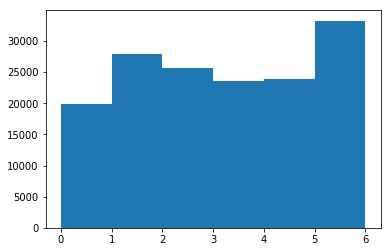

In [13]:
plt.hist(stops['date'].dt.weekday, bins=6)

> ### 按小时进行分析

(array([  9347.,   7207.,   5815.,   3518.,   2170.,   1252.,   2678.,
          5539.,   7814.,   6920.,   6848.,   5657.,   5085.,   5682.,
          5772.,   5284.,   7737.,   7765.,   5932.,   5501.,   6154.,
          9334.,  12879.,  12397.]),
 array([  0.        ,   0.95833333,   1.91666667,   2.875     ,
          3.83333333,   4.79166667,   5.75      ,   6.70833333,
          7.66666667,   8.625     ,   9.58333333,  10.54166667,
         11.5       ,  12.45833333,  13.41666667,  14.375     ,
         15.33333333,  16.29166667,  17.25      ,  18.20833333,
         19.16666667,  20.125     ,  21.08333333,  22.04166667,  23.        ]),
 <a list of 24 Patch objects>)

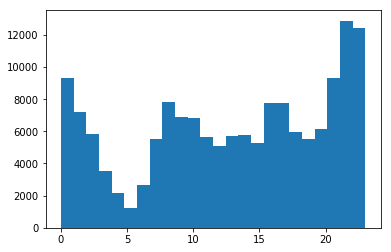

In [14]:
plt.hist(stops['date'].dt.hour, bins=24)

## 对数据进行过滤，只分析去年的

In [15]:
last_year = stops[stops['date'] > datetime.datetime(year=2015, month=2, day=18)]

In [16]:
last_year.head()

,date_of_stop,time_of_stop,agency,subagency,description,location,latitude,longitude,vehicle_type,year,...,model,color,violation_type,race,gender,driver_state,driver_city,dl_state,arrest_type,date
0,2016-11-23T00:00:00,10:56:00,MCP,"2nd district, Bethesda",DRIVING MOTOR VEHICLE ON HIGHWAY WITHOUT REQUI...,355 @ 410,38.984470,-77.094138,28 - Other,0.0,...,SCOOTER,GREEN,Citation,WHITE,M,DC,WASHINGTON,DC,A - Marked Patrol,2016-11-23 10:56:00
1,2016-11-23T00:00:00,13:36:00,MCP,"5th district, Germantown",DRIVER WHEN TURNING LEFT FAIL TO YIELD RIGHT O...,FREDERICK RD/SHAKESPEARE BLVD,39.198538,-77.244758,02 - Automobile,2005.0,...,ACCORD,WHITE,Citation,OTHER,F,MD,FREDERICK,MD,A - Marked Patrol,2016-11-23 13:36:00
2,2016-11-23T00:00:00,14:16:00,MCP,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,S/B 29 @ BLACKBURN RD,39.104683,-76.933665,02 - Automobile,2012.0,...,2S,WHITE,Citation,WHITE,F,MD,COLUMBIA,MD,A - Marked Patrol,2016-11-23 14:16:00
3,2016-11-23T00:00:00,16:45:00,MCP,"5th district, Germantown",FRAUD IN USE OF MVA ID CARD,RIVER RD & FALLS RD,NaN,NaN,02 - Automobile,2016.0,...,FUSION,SILVER,Citation,BLACK,M,MD,BELTSVILLE,MD,B - Unmarked Patrol,2016-11-23 16:45:00
4,2016-11-23T00:00:00,16:45:00,MCP,"5th district, Germantown",POSSESSING MORE THAN ONE DRIVER'S LICENSE AT A...,RIVER RD & FALLS RD,NaN,NaN,02 - Automobile,2016.0,...,FUSION,SILVER,Citation,BLACK,M,MD,BELTSVILLE,MD,B - Unmarked Patrol,2016-11-23 16:45:00


In [17]:
last_year.tail()

,date_of_stop,time_of_stop,agency,subagency,description,location,latitude,longitude,vehicle_type,year,...,model,color,violation_type,race,gender,driver_state,driver_city,dl_state,arrest_type,date
154282,2016-11-23T00:00:00,08:23:00,MCP,"2nd district, Bethesda",STOP LIGHTS (*),S/B OLD GEORGETOWN RD @ TUCKERMAN LN,39.033128,-77.125722,02 - Automobile,2005.0,...,4S,"BLUE, DARK",ESERO,HISPANIC,F,MD,ROCKVILLE,MD,A - Marked Patrol,2016-11-23 08:23:00
154283,2016-11-23T00:00:00,03:10:00,MCP,"4th district, Wheaton",STOP LIGHTS (*),VEIRS MILL/CONNECTICUT,39.052153,-77.075378,02 - Automobile,2007.0,...,TK,SILVER,ESERO,HISPANIC,M,MD,TAKOMA PARK,MD,A - Marked Patrol,2016-11-23 03:10:00
154284,2016-11-23T00:00:00,01:46:00,MCP,"5th district, Germantown",HEADLIGHTS (*),CENTURY BLVD @ AIRCRAFT DR,39.184027,-77.262855,02 - Automobile,2004.0,...,4S,RED,ESERO,WHITE,M,MD,BOYDS,MD,A - Marked Patrol,2016-11-23 01:46:00
154285,2016-11-23T00:00:00,01:51:00,MCP,"5th district, Germantown",STOP LIGHTS (*),OLD W BALTIMORE RD / 355,39.215440,-77.254230,02 - Automobile,2009.0,...,TK,RED,ESERO,BLACK,F,MD,BOYDS,MD,A - Marked Patrol,2016-11-23 01:51:00
154286,2016-11-23T00:00:00,04:14:00,MCP,"2nd district, Bethesda",HEADLIGHTS (*),OLD GEORGETOWN RD @ W CEDAR LN,39.005005,-77.110842,02 - Automobile,2004.0,...,PRIUS,SILVER,ESERO,BLACK,M,MD,COLUMBIA,MD,A - Marked Patrol,2016-11-23 04:14:00


In [18]:
morning_rush = last_year[(last_year['date'].dt.weekday < 5) & (last_year['date'].dt.hour > 5) & (last_year['date'].dt.hour < 10)]
print(morning_rush.shape)
last_year.shape

(20330, 21)


(154287, 21)

In [19]:
for name, row in morning_rush.iloc[:1].iterrows():
    print([row['longitude'], row['latitude']])

[-77.0900083333333, 38.973541666666705]
